# Assignment 1 - Normalizing Continuous Features

Consider data drawn from a 2 dimensional Normal distribution. 
Normalize the data by first subtracting the mean from each dimension and then divide the result by its respective standard deviation. 

(-10, 10)

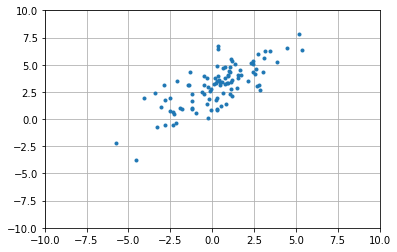

In [1]:
import matplotlib.pylab as plt
import numpy as np
from numpy.random import multivariate_normal as mvn
%matplotlib inline

# generates some toy data
mu = np.array([0,3])
C = np.array([[5.,4.],[4.,5.]])
X = mvn(mu,C,100)

# plot the data
plt.plot(X[:,0], X[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

In [2]:
mu = X.mean(axis=0)
mu

array([0.28048144, 3.06420142])

In [3]:
stdev = X.std(axis=0)
stdev

array([2.04122362, 1.98903879])

In [4]:
Xnormalized = (X - mu) / stdev

(-10, 10)

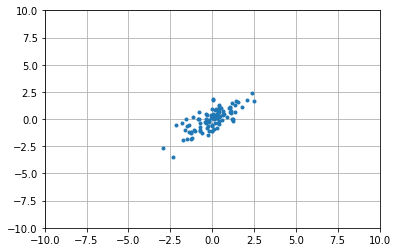

In [5]:
# plot the data
plt.plot(Xnormalized[:,0], Xnormalized[:,1], '.')
plt.grid()
lim = [-10, 10]
plt.xlim(lim)
plt.ylim(lim)

# Assignment 2 - One-Hot Encoding

Consider the data set ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

Write a function ``one_hot_encoding`` that takes a list of strings like the above and returns a samples-by-unique-items numpy array in which each row corresponds to the one-hot-encoded version of the respective data point in the original list.

In [6]:
data = ['blue', 'yellow', 'blue', 'green', 'red', 'yellow']

In [7]:
def one_hot_encoding(string_list):
    # hold all class tupes in one array
    uniqueClass = np.unique(string_list)
    # enumerate each class
    # class_type = enumerate(uniqueClass)
    
    # how many different classes == columns in the result array
    numClasses = len(uniqueClass)
    # how many input values == rows in result array
    numberOfInputVal = len(string_list)
    # create array with diagonal ones
    EncodedClasses = np.identity(numClasses)
    
    # print classes and encoded class array
    #print (uniqueClass, numClasses)
    #print('encoded class array: ', EncodedClasses)
    
    # create result array of correct size
    oneHotResult = np.zeros ((numberOfInputVal,numClasses))
    #print(oneHotResult)
    
    for idx, class_type in enumerate(string_list):
        #print(class_type)
        val = np.where(uniqueClass == class_type)
        #print(val[0])
        # overwrite each row with code
        oneHotResult[idx,:] = EncodedClasses[val[0],:]

    return oneHotResult

In [8]:
one_hot_encoded_data = one_hot_encoding(data)
one_hot_encoded_data

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [9]:
# tests whether the first row encoding is the same as the third
assert (one_hot_encoded_data[0,:] - one_hot_encoded_data[2,:]).sum() == 0
# tests whether the second row encoding is the same as the last
assert (one_hot_encoded_data[1,:] - one_hot_encoded_data[-1,:]).sum() == 0
# tests whether each row has only one non-zero entry
assert (one_hot_encoded_data.sum(axis=1) - np.ones(one_hot_encoded_data.shape[0])).sum() == 0

# Assignment 3 - Bag-of-Words Features

Consider the following data set

```python
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']
```

Implement a function ``bag_of_words`` that takes a list of sentences as strings and transforms them into a (preferably sparse) numpy array of size number-of-data-points-by-number-of-words-in-the-corpus.

Compare your result with the result from [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [10]:
corpus = [
     'This is the first document.',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?']

In [11]:
import re 

def bag_of_words(corpus):
    #print(corpus)
    seperator = ' '
    nosep = seperator.join(corpus)
    res = re.findall(r'\w+', nosep) 
    #print(res)
    valsLower = [item.lower() for item in res]
    #print(valsLower)
    # valsLower contains whole text in lower case
    # now create the dictionary of sorted words
    uniqueWords = np.unique(valsLower)
    #print (uniqueWords)
    
    # output array
    bag_of_words = np.zeros ((len(corpus),len(uniqueWords)))
    #print(bag_of_words)
    # now do the same for each line and count word histogram
    # first strip symbols
    
    for idx,strLine in enumerate(corpus):
        lettersOnly = re.findall(r'\w+', strLine) 
        valsLower = [item.lower() for item in lettersOnly]
        #print(valsLower)
        # another for loop for each string
        for word in valsLower:
            #print(word)
            val = np.where(uniqueWords == word)
            #print(val)
            #print(idx)
            # add 1 to each histogram position
            bag_of_words[idx,val[0]] += 1 
    
    #print(bag_of_words)
    #word_histogram = ...
    return bag_of_words

In [14]:
my_bag = bag_of_words(corpus)

# test
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
# optional print
#print("Vocabulary: {}".format(vectorizer.get_feature_names()))
vectorizerRes = X.toarray()

if (np.array_equal(my_bag, vectorizerRes)):
    print('Arrays are identical, self made bag successful!')
else:
    print('Arrays NOT identical!')

print('self made bag: \n',my_bag)

Arrays are identical, self made bag successful!
self made bag: 
 [[0. 1. 1. 1. 0. 0. 1. 0. 1.]
 [0. 2. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 1.]
 [0. 1. 1. 1. 0. 0. 1. 0. 1.]]
